In [45]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

### Nodos:
2; 5.
### Variables:
TEMPERATURA; HUMEDAD RELATIVA; HUMEDAD DE LA TIERRA; NIVEL UV; INTENSIDAD LUMÍNICA.

In [67]:
# Se leen los datos desde el archivo medidas.csv
datos=pd.read_csv('medidas.csv')
# Se define una tabla que contiene las mediciones de un único nodo
nodo = 2
tabla = datos.query('NODO == %s' %nodo).reset_index(drop=True)
# Se define la variable que se va a analizar
var='HUMEDAD DE LA TIERRA'

,IDMEDIDA,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA
count,11042.0,11042.0,11042.0,11042.0,11042.0,11042.0,11042.0
mean,10996.4,2.0,28.7,37.1,42.1,0.0,3289.7
std,6398.0,0.0,5.8,21.7,35.0,0.1,2775.5
min,1.0,2.0,-20.0,5.0,0.8,0.0,0.0
25%,5431.5,2.0,25.0,19.0,5.3,0.0,0.0
50%,10958.0,2.0,28.0,31.0,62.9,0.0,5636.0
75%,16549.5,2.0,32.0,48.0,75.3,0.0,5847.0
max,22812.0,2.0,60.0,95.0,90.2,1.0,5941.0


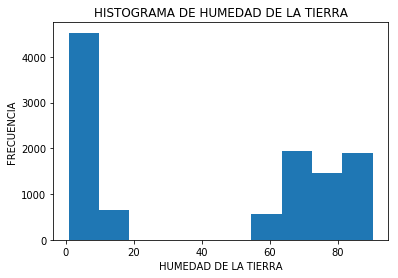

In [68]:
# Presenta la distribución de los datos en un histograma
plt.hist(tabla[var])
plt.title('HISTOGRAMA DE %s' %var)
plt.xlabel(var)
plt.ylabel('FRECUENCIA')
# Permite visualizar el resumen estadístico de la variable
tabla.describe()

In [78]:
delta=np.array((tabla[var].iloc[1:])-np.array(tabla[var].iloc[0:-1]))
delta=pd.DataFrame(delta)
delta.describe()

,0
count,11041.0
mean,-0.0
std,0.8
min,-41.2
25%,0.0
50%,0.0
75%,0.0
max,19.9


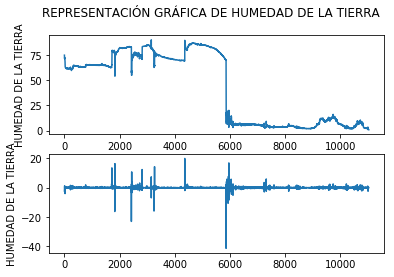

In [79]:
plt.suptitle('REPRESENTACIÓN GRÁFICA DE %s' %var)
plt.subplot(211)
tabla[var].plot()
plt.ylabel('%s' %var)
plt.subplot(212)
plt.ylabel('%s' %var)
plt.plot(delta)

Text(0,0.5,'HUMEDAD DE LA TIERRA PARA UN TIEMPO t+1')

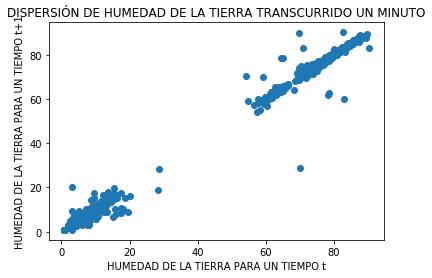

In [81]:
plt.scatter(tabla[var].iloc[0:-1],tabla[var].iloc[1:])
plt.title('DISPERSIÓN DE %s TRANSCURRIDO UN MINUTO' %var)
plt.xlabel('%s PARA UN TIEMPO t' %var)
plt.ylabel('%s PARA UN TIEMPO t+1' %var)